# STOPPED IN PART 3: 00:00:00

# Imports

In [902]:
import torch
import random
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [903]:
# Read all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [904]:
len(words)

32033

In [905]:
# Build the vocavulay of characters and mappings to and from integers
chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i: s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [906]:
# Build the dataset

block_size = 3 # Context length. This is how many characters are taken to predict the next one
X, Y = [], []
for w in words[:5]:
    print(w)
    context = [0] * block_size # Start with a content of 0 tokens
    for ch in w + '.': # Itterate over all characters, building X and Y's contents
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] # crop context and append

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [907]:
X.shape, X.dtype, Y.shape, Y.dtype # X shows size of input in the y value of array shape (3). There are 32 characters right now (Only first 5 names are selected)

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [908]:
# Build the dataset
def build_dataset(words):
    block_size = 3 # Context length: how many characters do we take to predict the next one?
    X, Y = [], []
    for w in words:

        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

random.seed(42)
random.shuffle(words)
# training, validatio/dev, and test split
# 80%, 10%, 10%
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [909]:
C = torch.randn((27,2)) # 27 possible characters, each with a 2D embedding

In [910]:
# Vector of the 5th row. basically does one hot encoding for that value in the array
C[5]

tensor([-0.0069,  0.8356])

In [911]:
# Indexing using lists
# C[torch.tensor([5,6,7])]
C[X].shape

torch.Size([32, 3, 2])

In [912]:
# Embedding X into C
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

# Constructing hidden layer

In [913]:
# 6 inputs because there are 3 2D embeddings in emb (2*3)
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [914]:
# Turns emb into a [32,6] tensor by removing a tensor dimension and returning a tuple of all slices along a given dimension without it
torch.cat(torch.unbind(emb,1),1).shape

torch.Size([32, 6])

In [915]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [916]:
# Although a is a tensor of shape [18], .view(3, 3, 2) works as long as the numbers multiply to be the size of the tensor. 3 x 3 x 2 = 18. It is also more efficient to view a tensor in a multidimensional array
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [917]:
# Put -1 to have python auto determine the size of tensor
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [918]:
h.shape

torch.Size([32, 100])

In [919]:
h

tensor([[ 0.9974,  0.9689, -0.9359,  ...,  0.9969,  0.9375,  0.9437],
        [ 0.5494,  0.9986, -0.9885,  ...,  0.9955, -0.4335,  0.9543],
        [-0.9019,  0.9971, -0.9069,  ...,  0.9981,  0.1619,  0.9954],
        ...,
        [-0.9977,  0.9684,  0.1134,  ..., -0.8547,  0.7268,  0.8897],
        [ 0.4272,  0.3485,  0.5674,  ..., -0.9755,  0.7518, -0.8970],
        [ 1.0000, -0.4167,  0.1159,  ...,  0.9212,  0.9911, -0.9557]])

In [920]:
b1.shape

torch.Size([100])

In [921]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [922]:
logits = h @ W2 +b2
logits.shape

torch.Size([32, 27])

In [923]:
counts = logits.exp()

In [924]:
prob = counts/ counts.sum(1, keepdim=True)
prob.shape

torch.Size([32, 27])

In [925]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(16.3963)

In [926]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

# NN neatly

In [927]:
Xtr.shape, Ytr.shape # Dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [928]:
# Hidden Layer
g = torch.Generator().manual_seed(2147483647) # for reproducability
C = torch.randn((27, 10), generator = g)
W1 = torch.randn((30, 200), generator = g)
b1 = torch.randn(200, generator = g)
W2 = torch.randn((200, 27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = (C, W1, b1, W2, b2)

In [929]:
sum = (p.nelement() for p in parameters) # number of parameters in total

In [930]:
for p in parameters:
    p.requires_grad = True

In [931]:
#lrs means to search from lre = 10**-3 = 0.001 to lre = 10**0 = 1
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [932]:
# lri and lossi track loss and learning rate
lri = []
lossi = []
stepi = []

In [940]:
for i in range (200000):
    # Minibatch Construct
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # Forward Pass
    emb = C[Xtr[ix]] # (32,3,2)
    h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32,100)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])

    # Backward Pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # Update
    # lr = lrs[i] # Commented out now that we found optimal learning rate
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # Track Stats
    # lri.append(lre[i]) # Commented out now that we found optimal learning rate
    stepi.append(i)
    lossi.append(loss.log10().item())
print(loss.item())


1.930259346961975


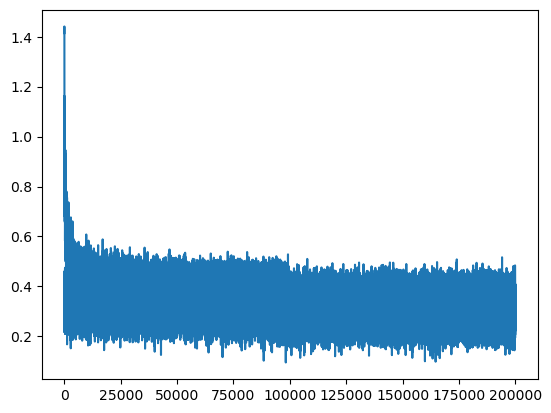

In [941]:
plt.plot(stepi, lossi)
plt.show()

In [942]:
emb = C[Xtr] # (32,3,2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32,100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0837, grad_fn=<NllLossBackward0>)

In [943]:
emb = C[Xdev] # (32,3,2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32,100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1427, grad_fn=<NllLossBackward0>)

In [944]:
emb = C[Xte] # (32,3,2)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # (32,100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Yte)
loss

tensor(2.1342, grad_fn=<NllLossBackward0>)

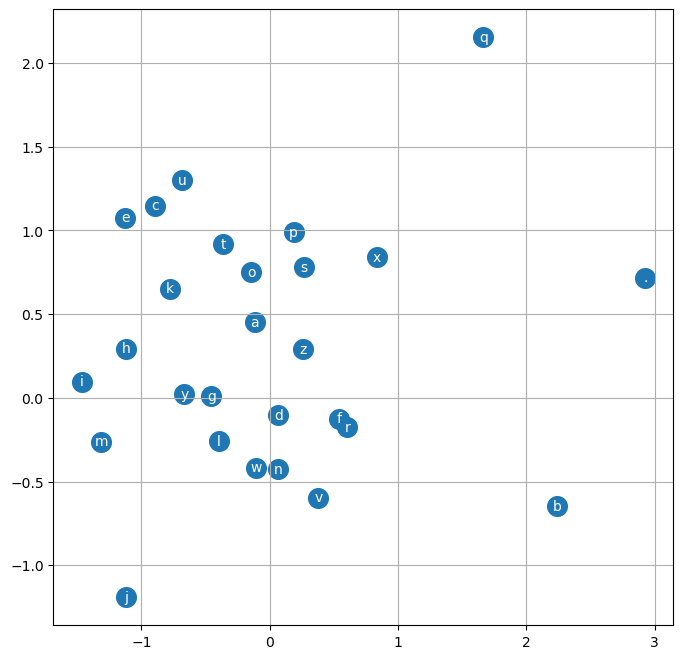

In [945]:
plt.figure(figsize=(8,8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')
plt.show()

In [946]:
# Sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
        emb = C[torch.tensor([context])] # (1, block_size, d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

carpah.
amelle.
khy.
mili.
taty.
sacayson.
rahnel.
amerynci.
geni.
nellara.
chaihvik.
legg.
hali.
jord.
quinthonor.
raiviani.
watell.
dearynn.
jacen.
ivra.
